### Step - 1 Import Libraries & Load Data

In [1]:
# Core Libraries

import pandas as pd
import numpy as np

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import joblib

# Scikit learn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score

# Suppress Warnings For Clarity

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Cleaned_Predictive_Modeling_Data.csv')

In [3]:
# Create A Working Copy Of The Dataset

data = df.copy()

# Preview The First 5 Rows

data.head()

,Payment,gender,Age,Industry,Profession,Credit_Score,platform,device_model,income_lac,assest_cr,...,Debt,Gold,Alt_Investments,Housing_Loan,Auto_Loan,Personal_Loan,Credit_Card,Education_Loan,Gold_Loan,Other_loan
0,Not Paid,Male,41,Educational Sector & Training Institutes,Professor,750.0,android,Samsung,18.28,0.735700,...,2.007,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,Not Paid,Male,35,"Miscellaneous, Metals, Construction & Other Sp...",Other Professions,750.0,ios,Apple IPhone,35.00,0.701200,...,2.300,0.000,0.012,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,Not Paid,Male,39,"Miscellaneous, Metals, Construction & Other Sp...",Other Professions,864.0,ios,Apple IPhone,41.00,1.973681,...,2.795,0.051,0.000,3.1,0.0,0.00,0.0,0.0,0.0,0.0
3,Not Paid,Male,21,Educational Sector & Training Institutes,Trading+ Business,0.0,android,Realme,2.10,0.210202,...,0.300,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,Not Paid,Male,28,Information Technology & Software Services,Software Developer,753.0,android,Motorola,32.00,0.198472,...,1.400,0.000,0.000,0.0,0.0,1.31,0.0,0.0,0.0,0.0


### Step - 2 Exploratory Data Analysis (EDA)

In [4]:
# Basic Info

print(data.shape)

(9610, 29)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Payment          9610 non-null   object 
 1   gender           9610 non-null   object 
 2   Age              9610 non-null   int64  
 3   Industry         9610 non-null   object 
 4   Profession       9610 non-null   object 
 5   Credit_Score     9610 non-null   float64
 6   platform         9610 non-null   object 
 7   device_model     9443 non-null   object 
 8   income_lac       9610 non-null   float64
 9   assest_cr        9610 non-null   float64
 10  Liabilities_cr   9610 non-null   float64
 11  VUA              9610 non-null   float64
 12  FBS_Latest       9610 non-null   float64
 13  City_Group       9610 non-null   object 
 14  Income_Bucket    9610 non-null   object 
 15  Age_Bucket       9610 non-null   object 
 16  Cibil_Bucket     9610 non-null   object 
 17  Real_Estate   

In [6]:
# Numerical Statistics

data.describe().T  

,count,mean,std,min,25%,50%,75%,max
Age,9610.0,34.770864,7.318480,20.0,30.000000,34.000000,38.000000,79.0000
Credit_Score,9610.0,704.592924,226.964148,0.0,750.000000,765.000000,800.000000,900.0000
income_lac,9610.0,29.264149,43.247297,0.0,12.000000,21.000000,36.000000,2655.0000
assest_cr,9610.0,1.584551,8.596432,0.0,0.109500,0.543500,1.579699,745.7500
Liabilities_cr,9610.0,0.203826,0.405375,0.0,0.000000,0.045000,0.257925,10.0000
VUA,9610.0,1.788372,8.643852,0.0,0.166995,0.664691,1.915880,745.8467
FBS_Latest,9610.0,52.795317,13.489080,0.0,44.000000,54.000000,63.000000,90.0000
Real_Estate,9610.0,9.015581,53.893237,0.0,0.000000,0.700000,10.000000,4815.0000
Equity,9610.0,3.471012,27.854233,0.0,0.050000,0.472000,2.000000,2100.8620
Debt,9610.0,2.671328,10.176906,0.0,0.252000,0.900000,2.525000,801.5000


In [7]:
# Missing Values

print(data.isnull().sum())

Payment              0
gender               0
Age                  0
Industry             0
Profession           0
Credit_Score         0
platform             0
device_model       167
income_lac           0
assest_cr            0
Liabilities_cr       0
VUA                  0
FBS_Latest           0
City_Group           0
Income_Bucket        0
Age_Bucket           0
Cibil_Bucket         0
Real_Estate          0
Equity               0
Debt                 0
Gold                 0
Alt_Investments      0
Housing_Loan         0
Auto_Loan            0
Personal_Loan        0
Credit_Card          0
Education_Loan       0
Gold_Loan            0
Other_loan           0
dtype: int64


#### **->** Suggestion:- Handle Missing Values 

In [8]:
# Find The Most Frequent Value (Mode) For The 'device_model' Column

mode_device = data['device_model'].mode()[0]
print(f"The most frequent device model is: {mode_device}")

# Fill The Missing Values (NaN) With The Mode

data['device_model'].fillna(mode_device, inplace=True)

# Verify That There Are No More Missing Values

print(f"\nMissing Values In 'device_model' After Filling: {data['device_model'].isnull().sum()}")

The most frequent device model is: Apple IPhone

Missing Values In 'device_model' After Filling: 0


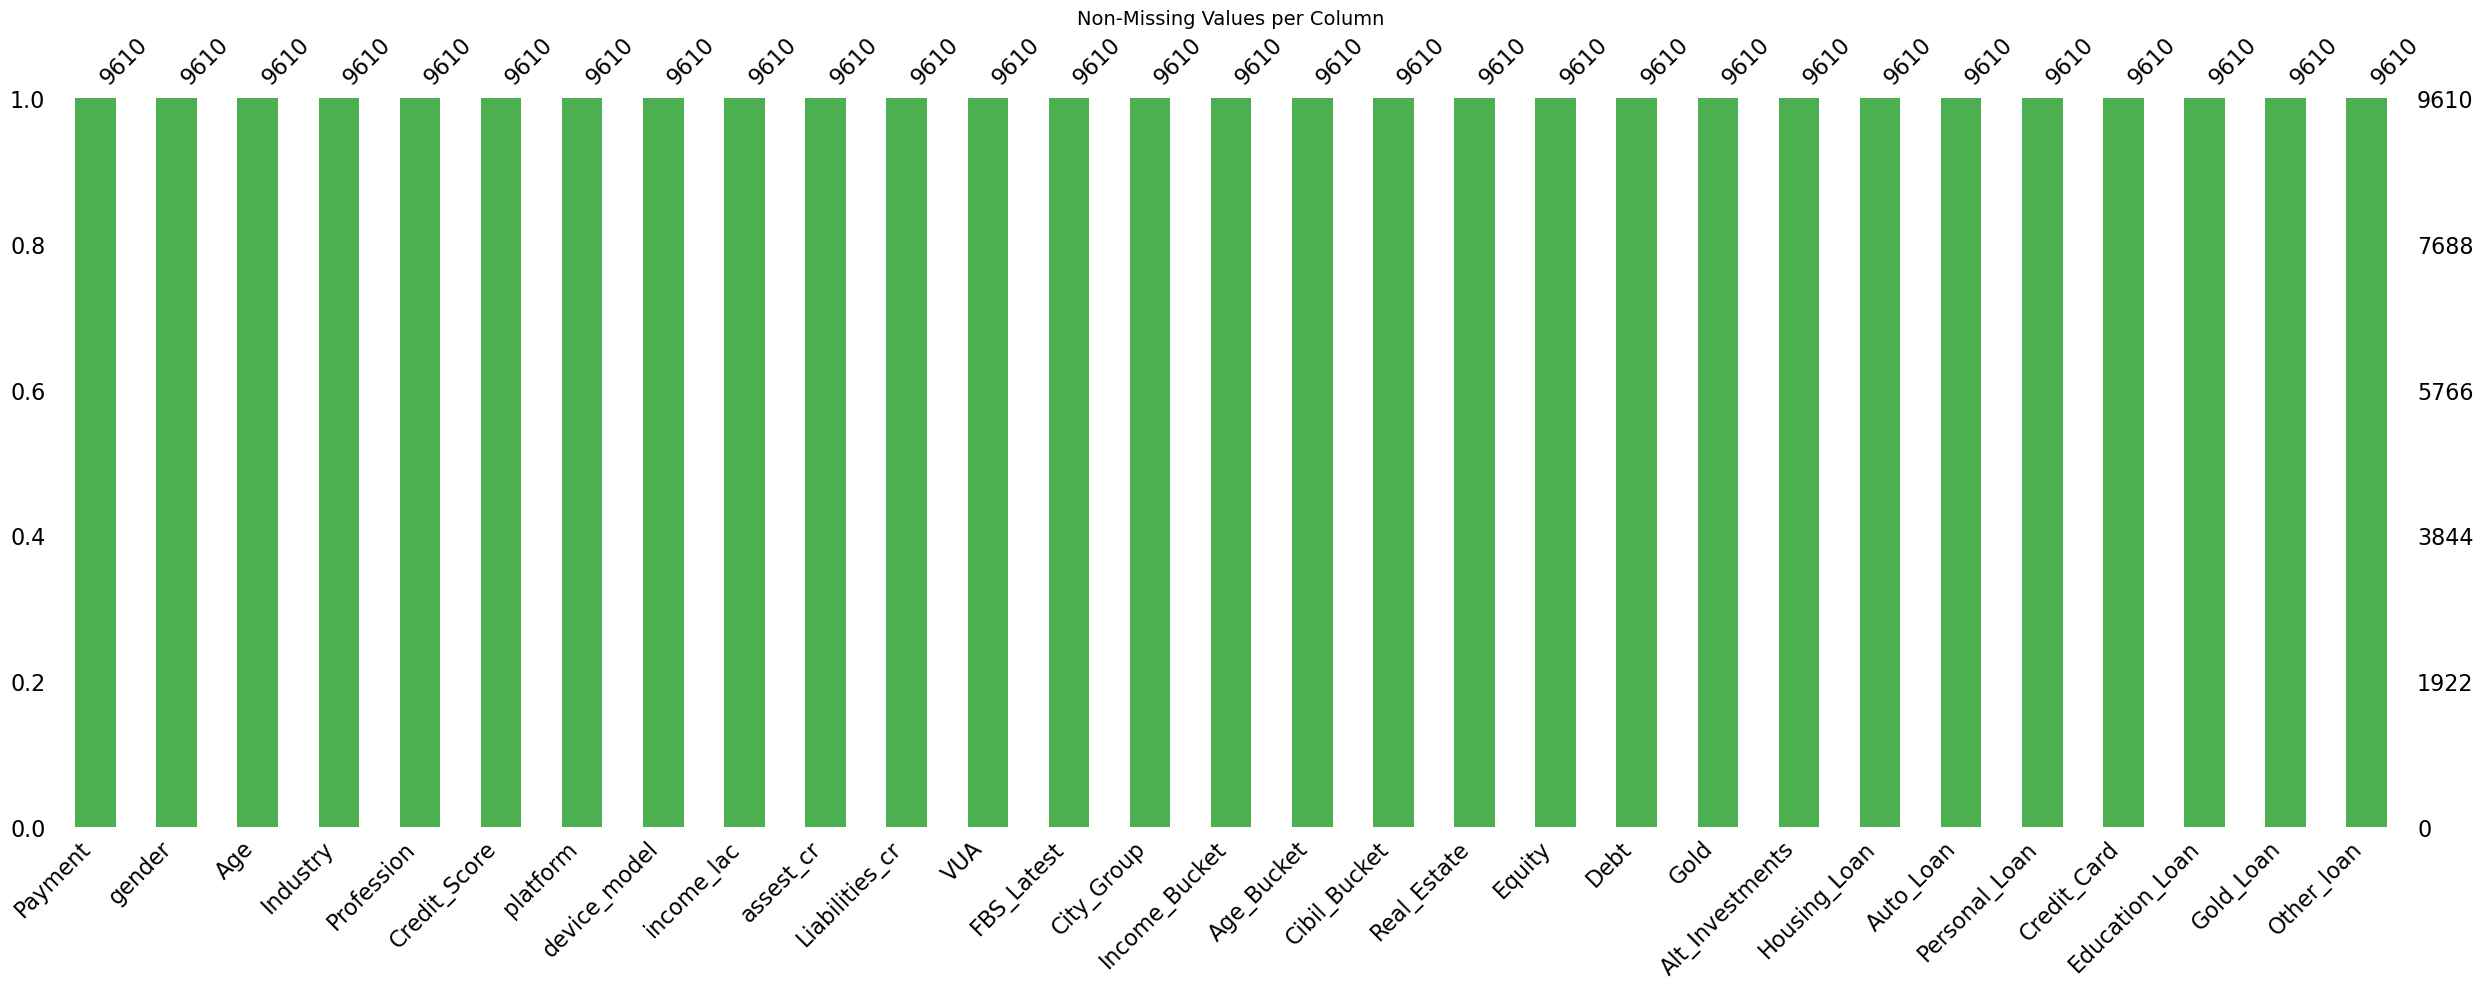

In [9]:
# Show & Visuliaze Any Missing alues

plt.figure(figsize=(18, 6))
msno.bar(
    data,
    color="#4CAF50"   
)
plt.title("Non-Missing Values per Column", fontsize=14)
plt.tight_layout()
plt.show()

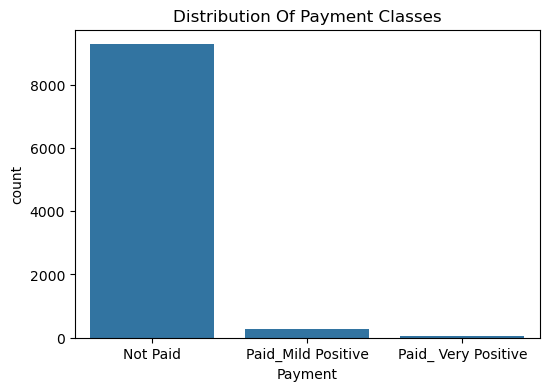

In [10]:
# Target Variable Distribution

plt.figure(figsize=(6,4))
sns.countplot(x="Payment", data=data)
plt.title("Distribution Of Payment Classes")
plt.show()

In [11]:
# Numeric & Categorical Separation

num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in data.columns if c not in num_cols and c != "Payment"]

print(num_cols)

['Age', 'Credit_Score', 'income_lac', 'assest_cr', 'Liabilities_cr', 'VUA', 'FBS_Latest', 'Real_Estate', 'Equity', 'Debt', 'Gold', 'Alt_Investments', 'Housing_Loan', 'Auto_Loan', 'Personal_Loan', 'Credit_Card', 'Education_Loan', 'Gold_Loan', 'Other_loan']


In [12]:
print(cat_cols)

['gender', 'Industry', 'Profession', 'platform', 'device_model', 'City_Group', 'Income_Bucket', 'Age_Bucket', 'Cibil_Bucket']


### Step - 3 Correlation / Mutual Information

In [13]:
# Encode Target Temporarily To Numeric

y_tmp = LabelEncoder().fit_transform(data["Payment"].astype(str))

In [14]:
y_tmp

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
# Mutual Info For Features

mi_scores = mutual_info_classif(
    pd.get_dummies(data[cat_cols + num_cols], drop_first=True),
    y_tmp
)

mi = pd.Series(mi_scores, index=pd.get_dummies(data[cat_cols + num_cols], drop_first=True).columns)
mi.sort_values(ascending=False).head(15).plot(kind="barh", figsize=(8,6))
plt.title("Top Features By Mutual Information With Payment")
plt.show()

### Step - 4 Feature Engineering

In [ ]:
# Engineered Columns

data["Debt_to_asset_ratio"] = data["Liabilities_cr"] / (data["assest_cr"] + 1e-6)                  # Total liabilities & Total Assets (In Crores)
                             # + 1e-6 Is A Tiny Number (0.000001) Added To The Denominator To Avoid Dividing By Zero When Assest_cr Is 0 Or Missing.
loan_cols = [
    "Housing_Loan","Auto_Loan","Personal_Loan","Credit_Card",
    "Education_Loan","Gold_Loan","Other_loan"
]
data["Total_loans"] = data[loan_cols].sum(axis=1)

### Step - 5 Define Target & Predictors

In [ ]:
# Map Target

y = data["Payment"].map({
    "Not Paid":0,
    "Paid_Mild Positive":1,
    "Paid_ Very Positive":2
})

# Candidate Predictors (Adjust After EDA)

features = [
    "gender","Age","Credit_Score","Cibil_Bucket","income_lac",
    "assest_cr","Liabilities_cr","Debt_to_asset_ratio",
    "VUA","FBS_Latest","City_Group","platform","device_model",
    "Real_Estate","Equity","Debt","Gold","Alt_Investments",
    "Total_loans"
]
X = data[features]

In [ ]:
y.head()

In [ ]:
X.head(2)

### Step - 6 Pre-Processing Pipeline Scale Numeric, Categorical Features + Encoding

In [ ]:
num_features = [
    "Age","Credit_Score","income_lac","assest_cr","Liabilities_cr",
    "Debt_to_asset_ratio","VUA","FBS_Latest","Real_Estate",
    "Equity","Debt","Gold","Alt_Investments","Total_loans"
]
cat_features = ["gender","Cibil_Bucket","City_Group","platform","device_model"]

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

In [ ]:
numeric_transformer

In [ ]:
categorical_transformer

In [ ]:
preprocessor

### Step - 7 Train–Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Step - 8 Fit Base Logistic Regression Modeling 

In [ ]:
# a) Define The Pipeline With class_weight='balanced'

log_reg_balanced = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(multi_class="multinomial",
                                solver="lbfgs",
                                max_iter=500,
                                class_weight='balanced')) 
])

In [ ]:
log_reg_balanced

### Step - 9 Hyperparameter Tuning & GridSearchCV Object:-

In [ ]:
# a) Define The Hyperparameter Grid For Tuning.

param_grid = {
    "clf__C": [0.01, 0.1, 1, 10]
}


# b) Create GridSearchCV With A More Robust Scoring Metric

grid = GridSearchCV(log_reg_balanced,
                    param_grid,
                    cv=5,
                    n_jobs=-1,
                    scoring="f1_weighted")  

grid.fit(X_train, y_train)

print(f"Best Params Based On F1-Weighted Score: {grid.best_params_}")
best_model = grid.best_estimator_

In [ ]:
print(grid)

### Step - 10 Evaluation Tuned Model

In [ ]:
# Predict On The Test Set Using The Best Model From GridSearchCV

y_pred = best_model.predict(X_test)

# Corrected Print Statements (Using y_pred)

print("Tuned Classification Report:\n", classification_report(y_test, y_pred, target_names=["Not Paid", "Mild", "Very"]))
print("\nTuned Accuracy:", accuracy_score(y_test, y_pred))

#### **->** Generate And Display The Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Paid", "Mild", "Very"],
            yticklabels=["Not Paid", "Mild", "Very"])
plt.title("Tuned Model Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Step - 11 Save Model & Scaler

In [ ]:
joblib.dump(best_model, "Best_Logistic_Model.pkl")
print("Model Saved.")

### Step - 12 Add Cross Validation Scores

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("\nCV Accuracy:", np.mean(cv_scores))

In [ ]:
cv_scores

### Step 13:- Predict On New Data

In [ ]:
# Load Saved Pipeline

model = joblib.load('Best_Logistic_Model.pkl')

# Create New Data Sample, But Keep Original Column Names 

new_data = pd.DataFrame([{
    'gender': 'Male',
    'Age': 33,
    'Credit_Score': 800,
    'Cibil_Bucket': 'Good',
    'income_lac': 15.2,
    'assest_cr': 0.8,
    'Liabilities_cr': 0.1,
    'Debt_to_asset_ratio': 1.25, 
    'VUA': 0.32,
    'FBS_Latest': 110.2,
    'City_Group': 'Metropolitan',
    'platform': 'android',
    'device_model': 'Samsung',
    'Real_Estate': 1.1,
    'Equity': 2.5,
    'Debt': 1.0,
    'Gold': 0.4,
    'Alt_Investments': 0.3,
    'Total_loans': 2.0  # Engineered As Sum Of All Loans
}])

# Predict

pred = model.predict(new_data)
pred_proba = model.predict_proba(new_data)

print("Predicted Class:", pred[0])
print("Class Probabilities:", pred_proba[0])